# Hands-on session 1: Features

These exercises cover the topics introduced in the day 2 [tagging tutorial](resources/tutorial_1.ipynb) introduction of working with **Features** attached to Tags.

## Radar trap example

![radar trap](resources/radar_trap.jpg)

While introducing the **RangeDimension** we used the example scenario of a [radar trap](../day_1/tutorial_1.ipynp), which measures the speed of passing cars. We will now extend on to this scenario by adding first identifying speeders in the data, and linking them to the raw measurements. Then we will add a "fine" for each speeder.

The code below creates a new set of speed measurements and also provides the index of the speeder, and the related fine. It stores the raw data to a nix file. Extend the program to also store and relate the detected speed limit violations to their fine:

1. Store the times of the speeders in an additional **DataArray** and link it to the speed data using a **MultiTag**
2. Store the fine in a separate **DataArray** and add it to the **MultiTag** as a **Feature**. What **LinkType** should be used?
3. Close the file.

4. Reopen the file for ``ReadOnly``.
5. Write a loop to read the actual speed (``tagged_data``), the time at which the speeder was observed and the associated fine (``feature_data``) from the **MultiTag** and print the information on the screen(``print(time, speed, fine)``).
6. Close the file.


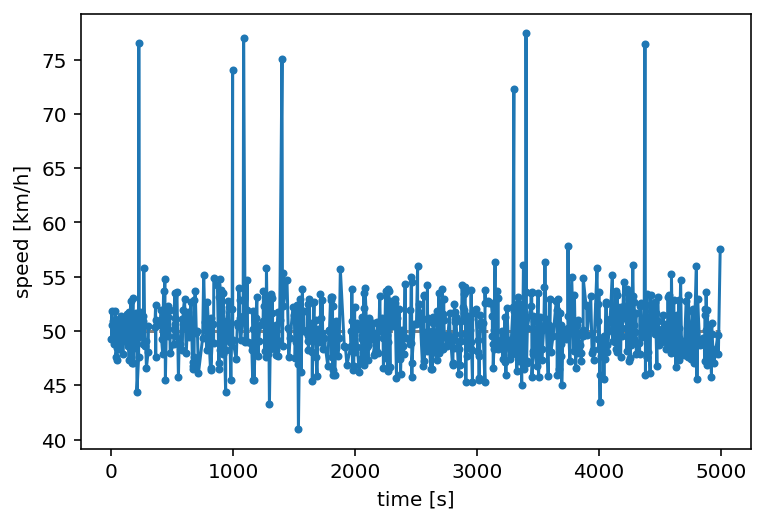

In [21]:
import os
import glob
import nixio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_formats = ['retina'] # only for users with a high resolution display


def radar_trap_data(duration=1000, car_probability=0.15, dt=0.01, speed_limit=50, speeder_probability=0.01):
    time = np.arange(0, duration, dt)
    car_times = time[np.random.random(len(time)) < (car_probability * dt)]
    car_speeds = speed_limit + np.random.randn(len(car_times)) * 0.05 * speed_limit
    indices = np.arange(len(car_times), dtype=int)
    np.random.shuffle(indices)
    speeders = indices[:int(np.round(speeder_probability * len(car_times)))]
    car_speeds[speeders] += 0.5 * speed_limit
    fines = car_speeds[speeders] * 1.5 + 15  # Euros ;)

    return car_times, car_speeds, speeders, fines


def plot_raw_data(times, speeds, speed_limit=50):
    plt.plot(times, speeds, marker=".", zorder=2)
    plt.xlabel("time [s]")
    plt.ylabel("speed [km/h]")
    plt.hlines([speed_limit], 0, times[-1], color="grey", ls="--", zorder=1)


times, speeds, speeders, fines = radar_trap_data(duration=5000)
plot_raw_data(times, speeds)

# store data to nix
nixfile = nixio.File.open("radar_trap.nix", nixio.FileMode.Overwrite)
block = nixfile.create_block("radar trap", "speed_measurements")

speed_array = block.create_data_array("car speeds", "nix.irregular_sampled", data=speeds, label="speed", unit="km/h")
speed_array.append_range_dimension(ticks=times, unit="s", label="time")

nixfile.close()

## Exercise 2: add a string feature

So far the speeder will go unpunished for we did not identify them. Let's remedy this and add the number plate information.

1. Replace the radar trap function with the version below.
2. Add the number plate information to the nix file **Note:** please pass the data type to the **DataArray** (``block.create_data_array(..., dtype=nixio.DataType.String, data=number_plates)``) and use it as an additional feature of the "Speeders" **MultiTag**.
3. Close the file.

4. Reopen it in ``ReadOnly`` mode.
5. Extend the solution from above to also show the number plate.
6. Close the file.

In [20]:

def generate_number_plate():
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    chosen_letters = np.random.choice(list(letters), 4)
    number_plate = "%s-%s-%i" % ("".join(chosen_letters[:2]), "".join(chosen_letters[2:]), np.random.randint(999))
    return number_plate


def radar_trap_data(duration=1000, car_probability=0.15, dt=0.01, speed_limit=50, speeder_probability=0.01):
    time = np.arange(0, duration, dt)
    car_times = time[np.random.random(len(time)) < (car_probability * dt)]
    car_speeds = speed_limit + np.random.randn(len(car_times)) * 0.05 * speed_limit
    indices = np.arange(len(car_times), dtype=int)
    np.random.shuffle(indices)
    speeders = indices[:int(np.round(speeder_probability * len(car_times)))]
    car_speeds[speeders] += 0.5 * speed_limit
    fines = car_speeds[speeders] * 1.5 + 15  # Euros ;)
    
    number_plates = []
    for i in range(len(fines)):
        number_plates.append(generate_number_plate())

    return car_times, car_speeds, speeders, fines, number_plates


## Exercise 3: Adding a multidimensional feature

The Features we added so far are rather easy, single numbers or strings for each tagged position. But what would be a radar trap if it didn't take pictures.

1. Recreate the radar trap data with the code below.
2. Extend the program to add the Image data to the nix file. **Note:** In order to use the image data as a feature, the first dimension of the image data must be as long as there are positions.
3. Add the Image Feature to the **MultiTag**.
4. Close the file.

5. Re-open for ``ReadOnly`` access.
6. For each of the positions get the image data and illustrate it.
7. Close the file.


In [13]:

def generate_number_plate():
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    chosen_letters = np.random.choice(list(letters), 4)
    number_plate = "%s-%s-%i" % ("".join(chosen_letters[:2]), "".join(chosen_letters[2:]), np.random.randint(999))
    return number_plate


def get_image():
    imgs = glob.glob(os.path.join("resources", "radar_trap_*.png"))
    img = np.random.choice(imgs)
    img_data = plt.imread(img)
    return img_data


def radar_trap_data(duration=1000, car_probability=0.15, dt=0.01, speed_limit=50, speeder_probability=0.01):
    time = np.arange(0, duration, dt)
    car_times = time[np.random.random(len(time)) < (car_probability * dt)]
    car_speeds = speed_limit + np.random.randn(len(car_times)) * 0.05 * speed_limit
    indices = np.arange(len(car_times), dtype=int)
    np.random.shuffle(indices)
    speeders = indices[:int(np.round(speeder_probability * len(car_times)))]
    car_speeds[speeders] += 0.5 * speed_limit
    fines = car_speeds[speeders] * 1.5 + 15  # Euros ;)
    
    number_plates = []
    pictures = []
    for i in range(len(fines)):
        number_plates.append(generate_number_plate())
        pictures.append(get_image())

    return car_times, car_speeds, speeders, fines, number_plates, pictures